# Ising Model

The two dimensional Ising model is defined by
\begin{equation}
H = -\frac{1}{2}\sum_{ij} J_{ij} S_i S_j.
\end{equation}
We will take $J_{ij}=1$ for the nearest neighbors and $0$
otherwise. $S_i$ can take the values $\pm 1$.

On an $L\times L$ lattice, we can choose
$$\omega_{XX'}=1/L^2 $$ if $X$ and $X'$ differ by one spin flip, and
$\omega_{XX'}=0$ otherwise.  This can be realized by selecting a spin
at random and try to flip it.

The energy diference $\Delta E = E(X')-E(X)$ in this case is cheap to
calculate because it depends only on the nearest neighbour bonds. If
$\Delta E <0$ the trial state is accepted and if $\Delta E>0$, the
trial step is accepted with probability $\exp(-\beta \Delta E)$. 


Keep in mind
- One can keep track of total energy and total magnetization at
  every step. The total energy and magnetization needs to be computed
  from the scratch only at the beginning. After that they can be
  updated (add difference due to spin flip).
- the quantity $\exp(-\beta\Delta E)$ takes only 5 different values
  at fixed temperature. It is advisable to store those five numbers
  and not recompute them at every step.
- Simulation can be started with random configuration
  corresponding to infinite temperature. The temperature can be slowly
  decreased through transition which is around $\beta J\approx 0.44$.


### Algorithm



- Choose temperature $T$ and precompute the exponents $[\exp(-8J/T),\exp(-4J/T),1,\exp(4J/T),\exp(8J/T)]$.

- Generate a random configuration $X_0$ (this is equivalent to infinite
  temperature).
- Compute the energy and magnetization of the configuration $X_0$. 
- Iterate the following steps many times
  
   * Select randomly a spin and compute the Weiss-field felt by
     that spin, i.e., $W_i = \sum_{j\; neighbor\; i} J_{ij} S_j$.
     The energy cost to flip the spin is $\Delta E = 2 S_i W_i$. Use
     the precomputed exponents to evaluate acceptance probability
     $P = min(1,\exp(-\Delta E/T))$.
   * Accept the trial step with probability $P$. If accepted,
     update spin lattice configuration, update the current energy ($E = E
     + \Delta E$), and the current magnetization $M = M - 2 S_i$.
   * Ones the Markow chain equilibrates, meassure the total
     energy and magnetization (also $E^2$, and $M^2$) every few Monte Carlo
     steps. {\textit{\textbf{Be carefull:} Do not meassure only the
         accepted steps. Every step counts. Meassure outside the
         acceptance loop. }}
 
- Print the following quantities:
    * $\langle E\rangle$, $\langle M\rangle$
    * $c_V = (\langle E^2\rangle -\langle E\rangle^2)/T^2$
    * $\chi = (\langle M^2\rangle -\langle M\rangle^2)/T$
 


The relation for specific heat can be derived from the following
identity
\begin{equation}
C_v = \frac{\partial \langle E\rangle}{\partial T} =
\frac{\partial}{\partial T}\left( \frac{Tr(e^{-E/T}E)}{Tr(e^{-E/T})} \right)
\end{equation}
and similar equation exists for $\chi$.

<img src="figs/scan0002.jpg" width="40%">

![magnetization vs time](figs/scan0003.jpg)
![magnetization vs temperature](figs/scan0004.jpg)
![energy](figs/scan0005.jpg)
![specific heat](figs/scan0006.jpg)

# Simulation of the Ising model

In [12]:
from numba import jit
from numpy import *
from numpy import random

N = 20 # size of the Ising system N x N

@jit(nopython=True)
def CEnergy(latt):
    "Energy of a 2D Ising lattice at particular configuration"
    Ene = 0
    N = len(latt)
    for i in range(N):
        for j in range(N):
            S = latt[i,j]
            #      right                 above             left                below
            WF = latt[(i+1)%N, j] + latt[i,(j+1)%N] + latt[(i-1)%N,j] + latt[i,(j-1)%N]
            Ene += -WF*S # Each neighbor gives energy -J==-1
    return Ene/2. # Each pair counted twice


def RandomL(N):
    "Radom lattice, corresponding to infinite temerature"
    #random.randint
    return array(sign(2*random.random((N,N))-1),dtype=int)

def Exponents(T):
    PW = zeros(9, dtype=float)
    # Precomputed exponents : PW[4+x]=exp(-x*2/T)
    PW[4+4] = exp(-4.*2/T)
    PW[4+2] = exp(-2.*2/T)
    PW[4+0] = 1.0
    PW[4-2] = exp( 2.*2/T)
    PW[4-4] = exp( 4.*2/T)
    return PW

In [15]:
latt = RandomL(N)
print(latt)
print('Energy=', CEnergy(latt))
T=2.269
PW = Exponents(T)

print('Exponents=', PW)

[[ 1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1  1 -1  1  1  1  1]
 [ 1 -1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1]
 [-1  1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1  1]
 [-1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1  1  1 -1  1 -1  1 -1 -1 -1  1 -1  1  1  1  1 -1]
 [ 1  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1  1  1]
 [-1 -1  1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1 -1  1  1 -1 -1]
 [-1 -1 -1  1 -1  1 -1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1]
 [-1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1  1]
 [-1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1 -1]
 [ 1 -1  1  1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1]
 [ 1 -1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1]
 [ 1 -1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1  1 -1 -1  1]
 [ 1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1]
 [-1 -1  1 -1  1 -1  1 -1  1  1 -1 -1 -1  1  1 -1 -1  1  1 -1]
 [ 1 -1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1

In [16]:
@jit(nopython=True)
def SamplePython(Nitt, latt, PW, warm, measure):
    "Monte Carlo sampling for the Ising model in Pythons"
    Ene = CEnergy(latt)    # Starting energy
    Mn  = sum(latt)         # Starting magnetization
    N   = len(latt)
    n_accept = 0  # how often we accept
    N1=0          # Measurements
    E1,M1,E2,M2=0.0,0.0,0.0,0.0
    
    N2 = N*N
    for itt in range(Nitt):
        t1,t2 = random.rand(2)  # one random number for random spin, the other for accepting the step with probability.
        t = int(t1*N2)
        (i,j) = (t % N, int(t/N))
        S = latt[i,j]
        WF = latt[(i+1)%N, j] + latt[i,(j+1)%N] + latt[(i-1)%N,j] + latt[i,(j-1)%N]
        # new configuration -S, old configuration S => magnetization change -2*S
        # energy change = (-J)*WF*(-S) - (-J)*WF*(S) = 2*J*WF*S
        # We will prepare : PW[4+x]=exp(-x*2/T)
        # P = exp(-2*WF*S/T) = exp(-(WF*S)*2/T) == PW[4+WF*S],
        # because PW[4+x]=exp(-x*2/T)
        P = PW[4+S*WF] # exp(-dE/T)
        if P>t2: #random.rand(): # flip the spin
            latt[i,j] = -S
            Ene += 2*S*WF
            Mn -= 2*S
            n_accept += 1
            
        if itt>warm and itt%measure==0:
            N1 += 1
            E1 += Ene
            M1 += Mn
            E2 += Ene*Ene
            M2 += Mn*Mn
       
    E,M, E2a, M2a = E1/N1, M1/N1, E2/N1, M2/N1    # <E>, <M>
    cv = (E2a-E**2)/T**2   #   cv =(<E^2>-<E>^2)/T^2
    chi = (M2a-M**2)/T     #   chi=(<M^2>-<M>^2)/T
    return (M/N2, E/N2, cv/N2, chi/N2, n_accept/Nitt)

In [18]:
from numpy import random

Nitt = 5000000  # total number of Monte Carlo steps
warm = 1000      # Number of warmup steps
measure=5        # How often to take a measurement


(M, E, cv, chi, p_accept) = SamplePython(Nitt, latt, PW, warm, measure)
print('<M>=', M/(N*N), '<E>=', E/(N*N) , 'cv=', cv, 'chi=',chi, 'p_accept=', p_accept)

<M>= 0.0008137585279641207 <E>= -0.0036002430488528193 cv= 1.6069034702218936 chi= 70.65938686079888 p_accept= 0.1902246


In [27]:
from numpy import random
wT = linspace(3.5,0.5,30)
wMag=[]
wEne=[]
wCv=[]
wChi=[]
N=20
latt = RandomL(N)
Nitt = 5000000   # total number of Monte Carlo steps at each temperature
warm = 1000      # Number of warmup steps
measure=5        # How often to take a measurement

for T in wT:
    # Precomputed exponents : PW[4+x]=exp(-x*2/T)
    PW = Exponents(T)
    (M, E, cv, chi, p_accept) = SamplePython(Nitt, latt, PW, warm, measure)
    wMag.append( M )
    wEne.append( E )
    wCv.append(  cv )
    wChi.append( chi )
    print('T=%7.4f M=%7.4f E=%7.4f cv=%7.4f chi=%7.4f p_accept=%7.4f' % (T,M,E,cv,chi,p_accept))

T= 3.5000 M=-0.0018 E=-0.6596 cv= 0.5910 chi= 2.7307 p_accept= 0.5481
T= 3.3966 M= 0.0025 E=-0.6864 cv= 0.5970 chi= 2.9004 p_accept= 0.5323
T= 3.2931 M= 0.0070 E=-0.7172 cv= 0.6254 chi= 3.3216 p_accept= 0.5152
T= 3.1897 M= 0.0074 E=-0.7508 cv= 0.6493 chi= 3.8418 p_accept= 0.4966
T= 3.0862 M=-0.0015 E=-0.7855 cv= 0.6732 chi= 4.3061 p_accept= 0.4781
T= 2.9828 M=-0.0073 E=-0.8224 cv= 0.6893 chi= 5.4311 p_accept= 0.4580
T= 2.8793 M=-0.0034 E=-0.8692 cv= 0.7298 chi= 6.8063 p_accept= 0.4341
T= 2.7759 M=-0.0174 E=-0.9269 cv= 0.8122 chi= 8.4824 p_accept= 0.4066
T= 2.6724 M=-0.0333 E=-0.9819 cv= 0.8767 chi=11.4143 p_accept= 0.3791
T= 2.5690 M= 0.0659 E=-1.0650 cv= 1.0584 chi=19.0296 p_accept= 0.3420
T= 2.4655 M= 0.1172 E=-1.1532 cv= 1.2916 chi=28.2185 p_accept= 0.3032
T= 2.3621 M=-0.1289 E=-1.2784 cv= 1.6454 chi=50.3603 p_accept= 0.2524
T= 2.2586 M= 0.1942 E=-1.4665 cv= 1.5967 chi=89.8242 p_accept= 0.1803
T= 2.1552 M= 0.8302 E=-1.6086 cv= 1.0273 chi= 2.4898 p_accept= 0.1278
T= 2.0517 M= 0.8836 

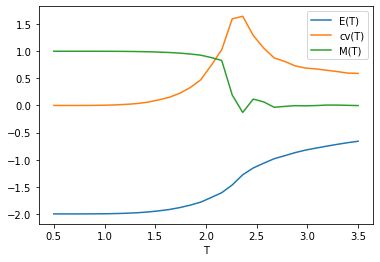

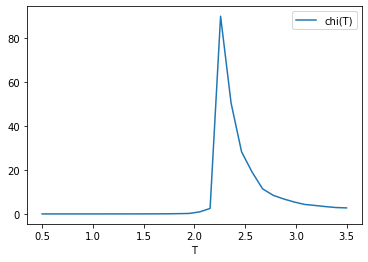

In [28]:
from pylab import *
%matplotlib inline

plot(wT, wEne, label='E(T)')
plot(wT, wCv, label='cv(T)')
plot(wT, wMag, label='M(T)')
xlabel('T')
legend(loc='best')
show()
plot(wT, wChi, label='chi(T)')
xlabel('T')
legend(loc='best')
show() 